In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install statsmodels
!pip install pmdarima

import pmdarima as pm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.2 MB/s eta 0:00:00


In [5]:
df = pd.read_csv('sp500_close.csv', index_col = 0, parse_dates = True)

In [6]:
df.head()

,AAL,AAPL,AAP,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,...,XLNX,XL,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
2013-02-08,14.75,67.8542,78.90,36.25,46.89,34.41,73.31,39.12,45.70,30.22,...,37.51,28.24,88.61,42.87,31.84,27.09,65.30,75.85,24.14,33.05
2013-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-11,14.46,68.5614,78.39,35.85,46.76,34.26,73.07,38.64,46.08,30.28,...,37.46,28.31,88.28,42.84,31.96,27.46,64.55,75.65,24.21,33.26
2013-02-12,14.27,66.8428,78.60,35.42,46.96,34.30,73.37,38.89,46.27,30.81,...,37.58,28.41,88.46,42.87,31.84,27.95,64.75,75.44,24.49,33.74


In [8]:
goog = df[['GOOG']].copy().dropna()

In [9]:
goog.head()

,GOOG
2014-03-27,558.46
2014-03-28,559.99
2014-03-31,556.97
2014-04-01,567.16
2014-04-02,567.00


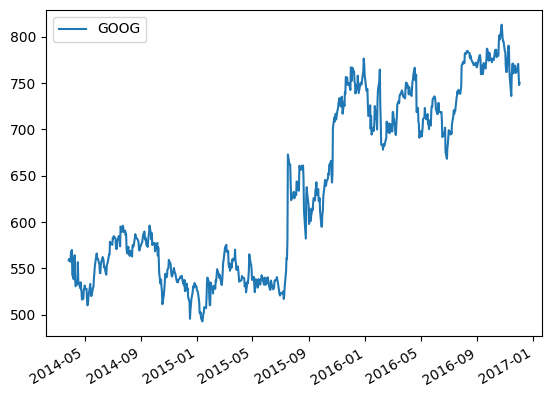

In [10]:
goog.plot();

In [11]:
goog_ret = np.log(goog.pct_change(1) + 1)

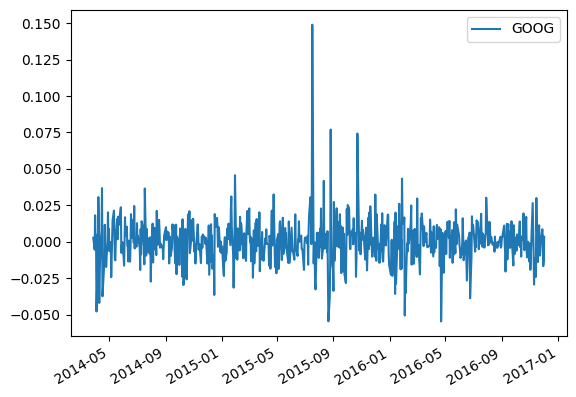

In [12]:
goog_ret.plot();

In [16]:
goog['SMA_10'] = goog['GOOG'].rolling(10).mean()
goog.head(15)

,GOOG,SMA_10
2014-03-27,558.46,NaN
2014-03-28,559.99,NaN
2014-03-31,556.97,NaN
2014-04-01,567.16,NaN
2014-04-02,567.00,NaN
2014-04-03,569.74,NaN
2014-04-04,543.14,NaN
2014-04-07,538.15,NaN
2014-04-08,554.90,NaN
2014-04-09,564.14,557.965


In [18]:
type(goog['GOOG'].rolling(10))

pandas.core.window.rolling.Rolling

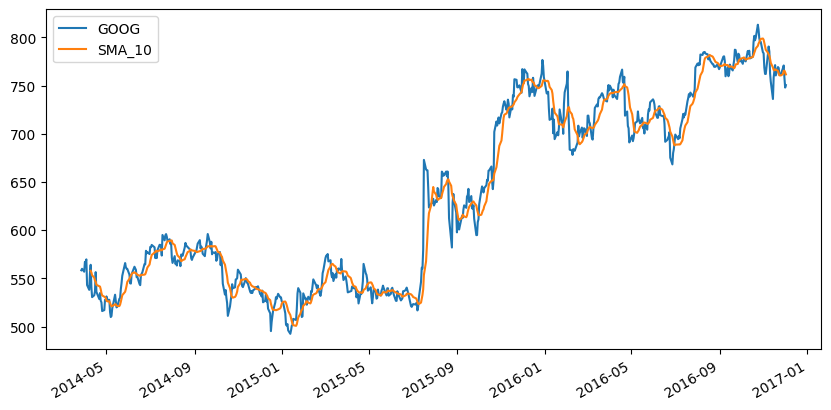

In [19]:
goog.plot(figsize = (10, 5));

In [21]:
goog['SMA_50'] = goog['GOOG'].rolling(50).mean()
goog.head(20)

,GOOG,SMA_10,SMA_50
2014-03-27,558.46,NaN,NaN
2014-03-28,559.99,NaN,NaN
2014-03-31,556.97,NaN,NaN
2014-04-01,567.16,NaN,NaN
2014-04-02,567.00,NaN,NaN
2014-04-03,569.74,NaN,NaN
2014-04-04,543.14,NaN,NaN
2014-04-07,538.15,NaN,NaN
2014-04-08,554.90,NaN,NaN
2014-04-09,564.14,557.965,NaN


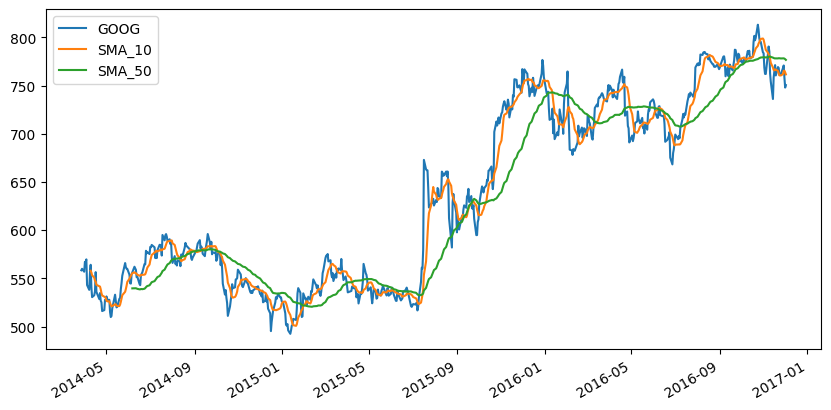

In [22]:
goog.plot(figsize = (10,5));

In [24]:
goog_appl = df[['GOOG', 'AAPL']].copy().dropna()
cov = goog_appl.rolling(50).cov()
cov

GOOG       AAPL
2014-03-27 GOOG         NaN        NaN
           AAPL         NaN        NaN
2014-03-28 GOOG         NaN        NaN
           AAPL         NaN        NaN
2014-03-31 GOOG         NaN        NaN
...                     ...        ...
2016-11-30 AAPL   36.504325   9.320843
2016-12-01 GOOG  240.836653  38.619251
           AAPL   38.619251   9.556456
2016-12-02 GOOG  253.092249  39.852150
           AAPL   39.852150   9.670892

[1358 rows x 2 columns]

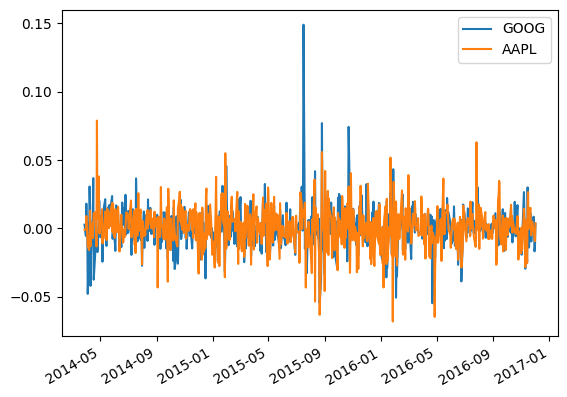

In [25]:
goog_appl_ret = np.log(goog_appl.pct_change(1)+ 1)
goog_appl_ret.plot();

In [29]:
goog_appl_ret['GOOG_SMA_50'] = goog_appl_ret['GOOG'].rolling(50).mean()
goog_appl_ret['AAPL_SMA_50'] = goog_appl_ret['AAPL'].rolling(50).mean()

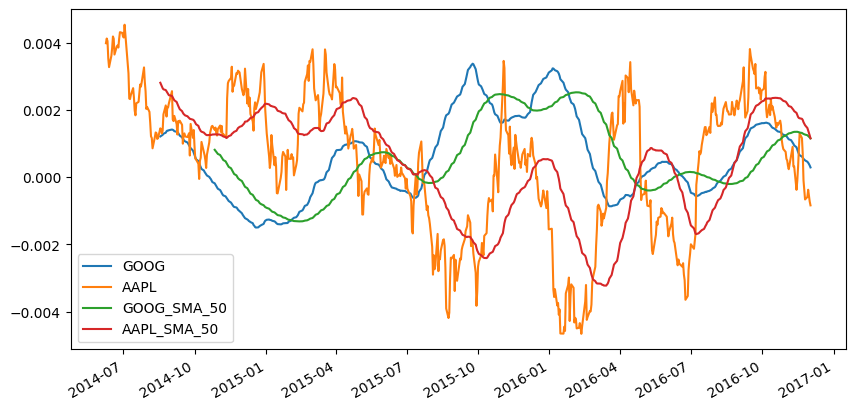

In [30]:
goog_appl_ret.plot( figsize = (10, 5));